# Explorations and deliberations

## Routing patterns

In [41]:
from meshed import code_to_dag, Pipe
from operator import methodcaller

disp_dag = Pipe(code_to_dag, methodcaller('dot_digraph', 'rankdir="LR"'))


<Pipe containing: code_to_dag, methodcaller>

In [46]:
def object_processing(obj, process_obj):
    processed_obj = process_obj(obj)
    return processed_obj

disp_dag(object_processing)

ValueError: All commands should be assignments, this one wasn't: lineno=3

In [48]:
from meshed.makers import *

it = parse_assignment_steps(object_processing)
next(it)

(<ast.Name at 0x2a5523ee0>, <ast.Call at 0x2a5523790>)

In [49]:
next(it)

ValueError: All commands should be assignments, this one wasn't: lineno=3

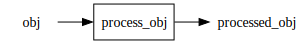

In [ ]:
def object_processing(obj, process_obj):
    processed_obj = process_obj(obj)

object_processing.dot_digraph('rankdir="LR"')

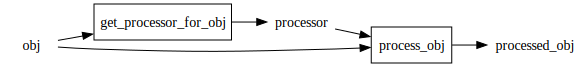

In [ ]:
@__import__('meshed').code_to_dag
def conditional_object_processing():
    processor = get_processor_for_obj(obj)
    processed_obj = process_obj(obj, processor)

conditional_object_processing.dot_digraph('rankdir="LR"')

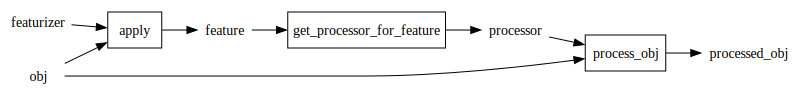

In [37]:
@__import__('meshed').code_to_dag
def feature_conditional_object_processing():
    feature = apply(obj, featurizer)
    processor = get_processor_for_feature(feature)
    processed_obj = process_obj(obj, processor)

feature_conditional_object_processing.dot_digraph('rankdir="LR"')

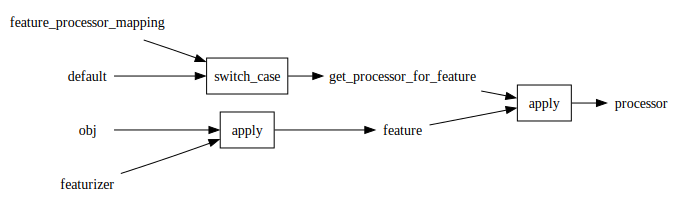

In [7]:
@__import__('meshed').code_to_dag
def feature_switch_object_processing():
    feature = apply(obj, featurizer)
    get_processor_for_feature = switch_case(feature_processor_mapping, default)
    processor = apply(get_processor_for_feature, feature)
    # processed_obj = process_obj(obj, processor)

feature_switch_object_processing.dot_digraph('rankdir="LR"')

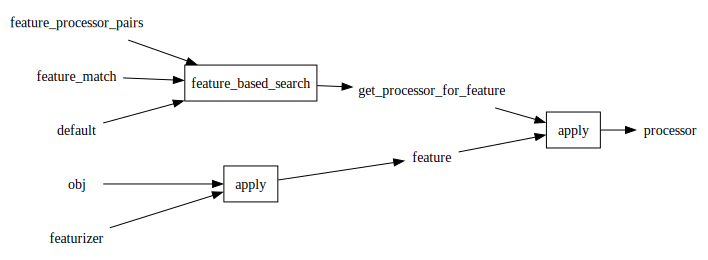

In [8]:
@__import__('meshed').code_to_dag
def feature_search_object_processing():
    feature = apply(obj, featurizer)
    get_processor_for_feature = feature_based_search(feature_processor_pairs, feature_match, default)
    processor = apply(get_processor_for_feature, feature)
    # processed_obj = process_obj(obj, processor)

feature_search_object_processing.dot_digraph('rankdir="LR"')

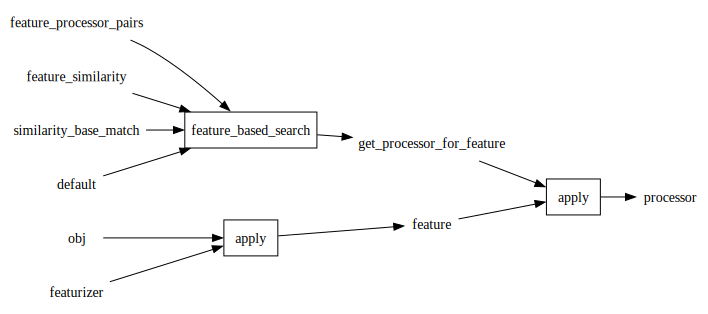

In [35]:
@__import__('meshed').code_to_dag
def feature_similarity_search_object_processing():
    feature = apply(obj, featurizer)
    get_processor_for_feature = feature_based_search(feature_processor_pairs, feature_similarity, similarity_base_match, default)
    processor = apply(get_processor_for_feature, feature)
    # processed_obj = process_obj(obj, processor)


feature_similarity_search_object_processing.dot_digraph('rankdir="LR"')

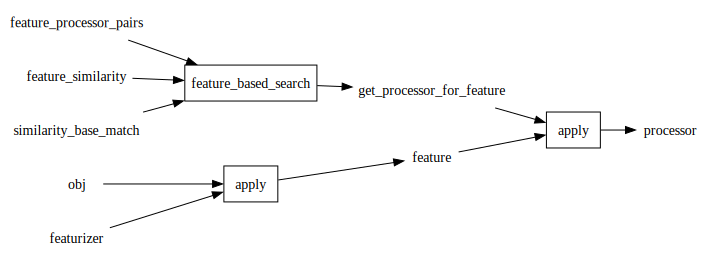

In [11]:
@__import__('meshed').code_to_dag
def feature_similarity_search_object_processing(similarity_base_match=lambda x: x):
    feature = apply(obj, featurizer)
    get_processor_for_feature = feature_based_search(feature_processor_pairs, feature_similarity, similarity_base_match)
    processor = apply(get_processor_for_feature, feature)
    # processed_obj = process_obj(obj, processor)

feature_similarity_search_object_processing.dot_digraph('rankdir="LR"')

In [27]:
def foo(x, y=2, z=3):
    return x + y * z

def bar(a, y, z=4):
    pass

def foob(x, y , z=2):
    return x + y - z

import i2

i2.Sig(foo)
foob(10, 2, 3)


9

In [18]:
f = i2.Sig(foo)(foob)
i2.Sig(f)

<Sig (x, y=2, z=3)>

In [20]:
foob(10, 2, 3)

9

In [34]:
# from qo import ddir

# ddir(i2.wrapper)
